In [ ]:
!pip install -q -U "tensorflow-text==2.8.*"
!pip install -q tf-models-official==2.7.0
!pip install --upgrade --no-cache-dir gdown

# Or install with a specific Version

import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
from tensorflow.keras.utils import plot_model

tf.get_logger().setLevel('ERROR')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from keras_preprocessing.image import img_to_array
import tensorflow as tf
import os
import tensorflow_hub as hub

In [ ]:
## download and unzip dataset 
##dataset downloald link ##
!unzip -u Memes.zip >.memeszip.log
!unzip -u labels.zip > .labeszip.log

In [ ]:
### constants 
img_width,img_height =224,224 
channels=3

In [ ]:
pol_df=pd.read_json('/content/Politics.json')
mov_df=pd.read_json('/content/Movies.json')
spo_df=pd.read_json('/content/Sports.json')
mov_df['Label']=[0]*len(mov_df)
spo_df['Label']=[1]*len(spo_df)
pol_df['Label']=[2]*len(pol_df)
add_Data=pd.concat([pol_df,mov_df,spo_df])

troll   = add_Data[add_Data['Trolling']==0]
No_troll= add_Data[add_Data['Trolling']==1]

troll=troll.sample(No_troll.Trolling.count(),random_state=2022)
reduce_df=pd.concat([troll,No_troll])
reduce_df=reduce_df.sample(frac=1,ignore_index=True)
# del pol_df,mov_df,spo_df

In [ ]:
def get_imgarray(df):
  path='./Memes/'
  img_array =[]
  for index,row in df.iterrows():
      # get file with index.png in folder 
      file_uri=path+row['img']
      if os.path.isfile(file_uri):
          img = load_img(file_uri)
          img=img.resize([img_width,img_height])
          img=(1.0/255.0)*img_to_array(img)
          img_array.append(img)
      else:
        print(file_uri)
  # plt.imshow(img_array[10], interpolation='nearest')
  return img_array      

reduce_df['img_arr']=get_imgarray(reduce_df)

In [ ]:
## load image as array 

temp=reduce_df['Text'].to_list()
temp2=reduce_df['img_arr'].to_list()
y_full = reduce_df['Trolling'].to_list()

temp2=np.array(temp2).reshape(-1, img_width, img_height, channels)


len(temp2)==len(temp),len(y_full)==len(temp)

(True, True)

In [ ]:
from sklearn.model_selection import train_test_split
### 10 % test 10% validdation 80% traning 
## get text split 
x_text_test, x_text_train, y_test, y_train     =   train_test_split(temp,y_full,random_state=2022,shuffle=True,train_size=0.1)

x_text_valid, x_text_train, y_valid, y_train   =   train_test_split(x_text_train ,y_train ,random_state=2022 ,shuffle=True, train_size=0.11 )

x_text_test=np.array(x_text_test)
x_text_valid=np.array(x_text_valid)
x_text_train=np.array(x_text_train)

## get text split 

x_img_test, x_img_train, y_test, y_train     =   train_test_split(temp2,y_full,random_state=2022,shuffle=True,train_size=0.1)

x_img_valid, x_img_train, y_valid, y_train   =   train_test_split(x_img_train ,y_train ,random_state=2022 ,shuffle=True, train_size=0.11 )

y_test = np.array(y_test)

y_train = np.array(y_train)

y_valid = np.array(y_valid)

x_img_valid = x_img_valid.reshape(-1, img_width, img_height, channels)

x_img_test  = x_img_test.reshape(-1, img_width, img_height, channels)

x_img_train = x_img_train.reshape(-1, img_width, img_height, channels)
x_img_train.shape

(1175, 224, 224, 3)

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-6_H-768_A-12'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
# image_model = tf.keras.applications.DenseNet169(include_top=False, weights='imagenet', 
#                                              input_shape=(
#                                                  img_width, 
#                                                  img_height, 
#                                                  channels
#                                              )
#                                             )
base_model=tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(img_width,img_height, channels),
    # pooling=None,
    classes=2,
)
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess,trainable=False)

In [ ]:

base_model.trainable=False
img_layer=base_model.layers[-1].output
# img_layer = tf.keras.layers.Dense(100,name='dense_1')(img_layer)
img_layer = tf.keras.layers.Dense(50,name='dense_1')(img_layer)
img_layer = tf.keras.layers.GlobalAveragePooling2D(name="image-layer")(img_layer)
img_layer = tf.keras.layers.Dropout(0.2,name="image-dropout")(img_layer)
img_layer = tf.keras.layers.Flatten()(img_layer)

img_model=tf.keras.Model(base_model.input,img_layer)

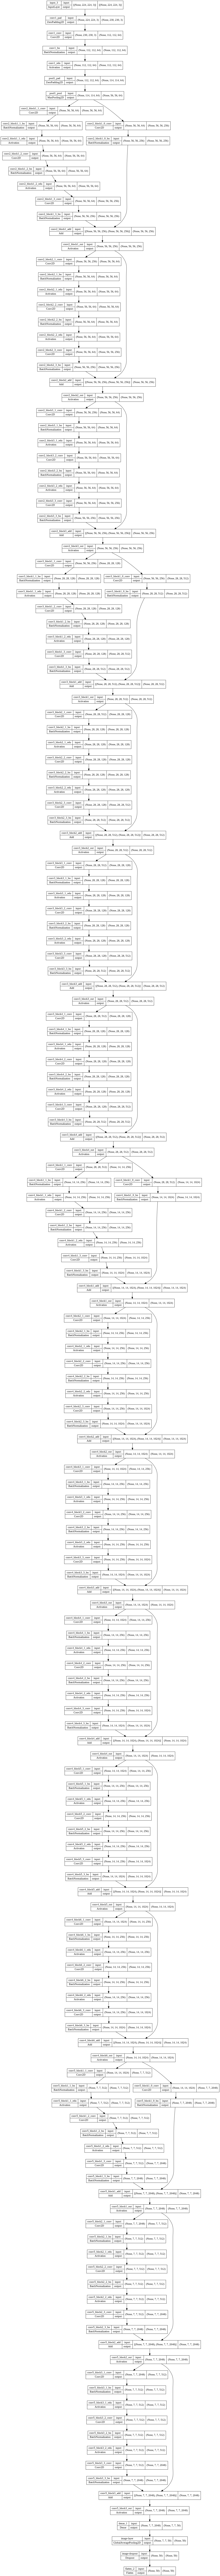

In [ ]:
plot_model( img_model,show_shapes=True)

In [ ]:
img_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
encoder_inputs = preprocessing_layer(text_input)

encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=False, name='BERT_encoder')
outputs = encoder(encoder_inputs)
text_layer = outputs['pooled_output']
text_layer = tf.keras.layers.Dropout(0.1)(text_layer)
text_layer = tf.keras.layers.Dense(256, activation=None, name='dense')(text_layer)
# text_layer = tf.keras.layers.Dense(1, activation=None, name='classifier')(text_layer)
text_model=tf.keras.Model(text_input,text_layer)


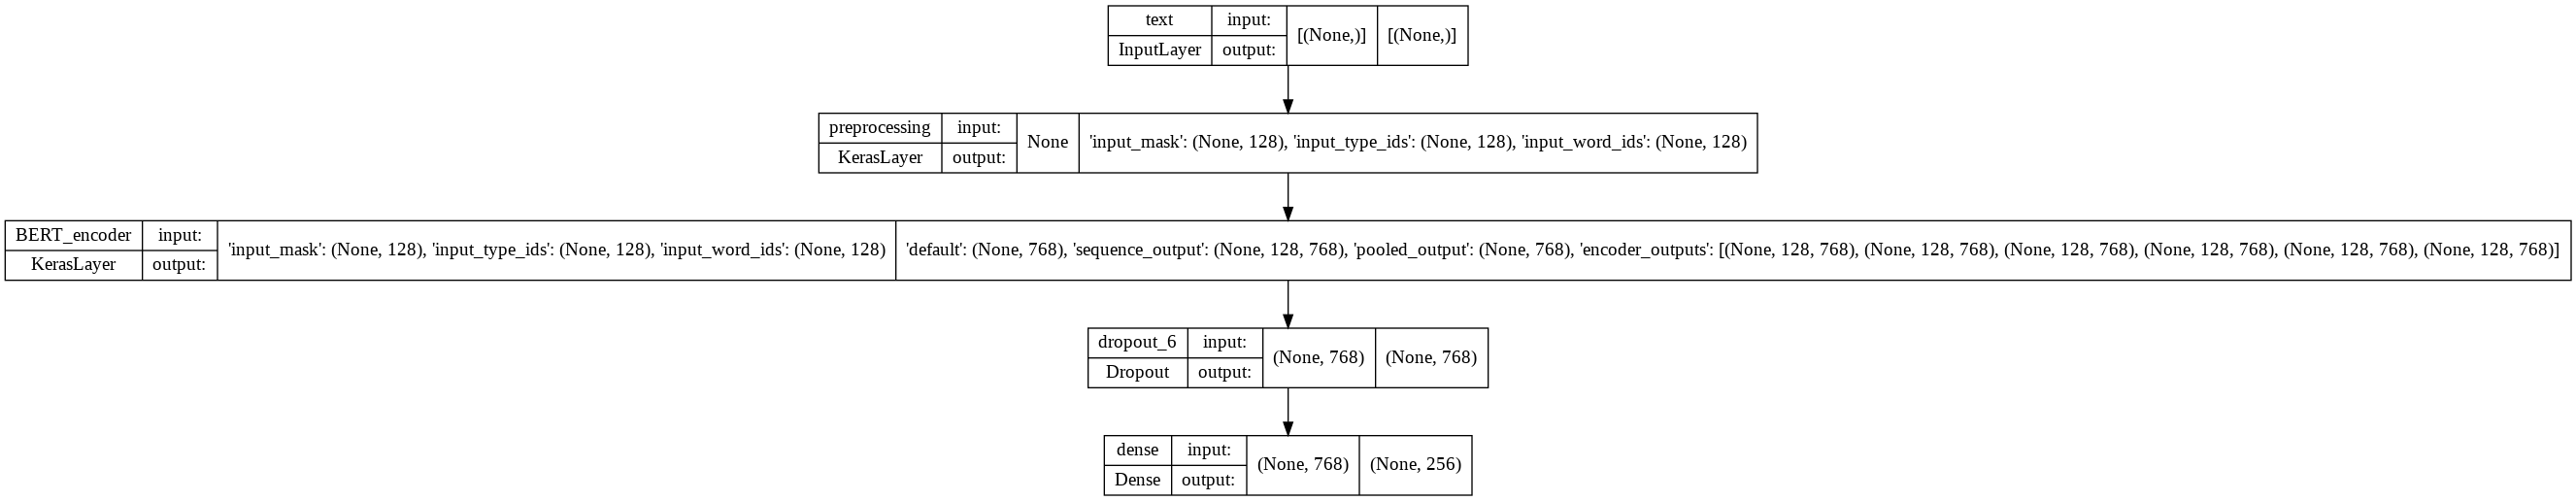

In [ ]:
plot_model( text_model,show_shapes=True)

In [ ]:
text_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [ ]:
### megrged model ###
## text_input inp for text ,base_model.input inp for img

concat=tf.keras.layers.concatenate(inputs=[img_model.layers[-1].output,text_model.layers[-1].output])
merged = tf.keras.layers.Dense(2,name='dense_2')(concat)
merged = tf.keras.layers.Dropout(0.2)(merged)
merged = tf.keras.layers.Dense(1,activation='sigmoid',name='ouput')(merged)
multi_model=tf.keras.Model([img_model.input,text_model.input],merged)

In [ ]:
plot_model(multi_model,show_shapes=True)

In [ ]:
learning_rate = 1e-4
batch_size = 20
seed = 42
multi_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate) ,
                         loss= tf.keras.losses.binary_crossentropy,
                         metrics = 'accuracy')

In [ ]:
epochs=7
# merged=np.concatenate([x_img_train,x_text_train])

history = multi_model.fit(        
        x=[x_img_train,x_text_train],
        y=y_train,
        batch_size = batch_size,
        epochs= epochs,
        validation_data=([x_img_valid,x_text_valid],y_valid)
    )

Epoch 1/7
59/59 [==============================] - 20s 217ms/step - loss: 0.7293 - accuracy: 0.5072 - val_loss: 0.7373 - val_accuracy: 0.4828
Epoch 2/7
59/59 [==============================] - 11s 193ms/step - loss: 0.7095 - accuracy: 0.5030 - val_loss: 0.6980 - val_accuracy: 0.4966
Epoch 3/7
59/59 [==============================] - 11s 194ms/step - loss: 0.7003 - accuracy: 0.5166 - val_loss: 0.7192 - val_accuracy: 0.4690
Epoch 4/7
59/59 [==============================] - 11s 193ms/step - loss: 0.7225 - accuracy: 0.5311 - val_loss: 0.6969 - val_accuracy: 0.5310
Epoch 5/7
59/59 [==============================] - 12s 195ms/step - loss: 0.7020 - accuracy: 0.5362 - val_loss: 0.7371 - val_accuracy: 0.4828
Epoch 6/7
59/59 [==============================] - 12s 208ms/step - loss: 0.6952 - accuracy: 0.5387 - val_loss: 0.7033 - val_accuracy: 0.4897
Epoch 7/7
59/59 [==============================] - 12s 198ms/step - loss: 0.6873 - accuracy: 0.5387 - val_loss: 0.6974 - val_accuracy: 0.5310


In [ ]:
y_pred=multi_model.predict([x_img_test,x_text_test])
y_pred=np.rint(y_pred)
# y_pred

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
label_map = { 0 : 'Troll', 1 : 'No Troll'}
CATEGORIES = list(label_map.values())

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=CATEGORIES))

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Confusion Matrix
[[44 30]
 [33 39]]
Classification Report
              precision    recall  f1-score   support

       Troll       0.57      0.59      0.58        74
    No Troll       0.57      0.54      0.55        72

    accuracy                           0.57       146
   macro avg       0.57      0.57      0.57       146
weighted avg       0.57      0.57      0.57       146


Accuracy: 0.57

Micro Precision: 0.57
Micro Recall: 0.57
Micro F1-score: 0.57

Macro Precision: 0.57
Macro Recall: 0.57
Macro F1-score: 0.57

Weighted Precision: 0.57
Weighted Recall: 0.57
Weighted F1-score: 0.57
